We hope that in the upramp, the $\alpha_m$ is a constant. From 
$$\alpha_m = -\frac{1}{2}\frac{d\beta_m(z)}{dz}$$
We have:
$$\beta_m(z) = \beta_{m0} - 2\alpha_m z$$
where $\beta_{m0} = \beta_m(0)$. (Similarly, we use $n_0 = n(0)$, $\omega_{p0} = \omega_p(0)$)

We know $\beta_m(z) = \sqrt{2\gamma} \frac{c}{\omega_p(z)}$, and we assume the beam is not accelerating in the plasma ramp. So:
$$\frac{n(z)}{n_0} = \frac{\omega_p(z)^2}{\omega_{p0}^2} = \frac{\beta_{m0}^2}{\beta_m(z)^2} = \frac{1}{(1 - \frac{2\alpha_m z}{\beta_{m0}})^2}$$

Notice that for a upramp, $\alpha_m > 0$. The exit of the upramp (also the entrance of the uniform acceleration region) is at $z = 0$, so we have $z < 0$ in the upramp.

To satisfy the adiabatic condition, we choose $\alpha_m = 0.1$. 

We use $c/\omega_{p0}$ (the skin depth for the uniform acceleration region) to normalize all the length.

We choose a 10 GeV beam ($\gamma \approx 20000$), so $\beta_{m0} = \sqrt{2\gamma} = 200$

We have:

$$\frac{n(z)}{n_0} = \frac{1}{(1 - \frac{z}{1000})^2}$$

If we assume at the entrance of the upramp, $n_{entrance} = n_0 / 100$, we can determine that the entrance is at: $z_{entrance} = -9000$ (So the length of the ramp is 9000. This length will be longer if we assume the beam has a larger $\gamma$)

The plasma density upramp looks like the following:

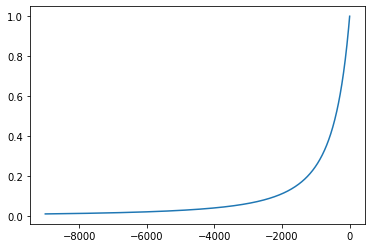

In [11]:
import numpy as np
import matplotlib.pyplot as plt

alpha_m = 0.1
gamma = 20000

beta_m0 = np.sqrt(2 * gamma)
z = np.linspace(-9000,0,901)
n = 1 / (1 - 2 * alpha_m * z / beta_m0) ** 2
plt.plot(z,n)
plt.show()

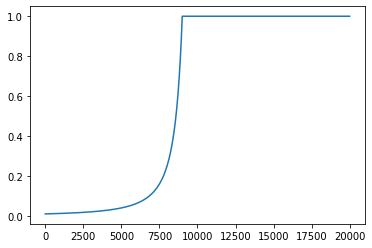

In [12]:
# shift the entrance to z = 0, then append a uniform acceleration region
z_shift = z - z[0]
z_shift = list(z_shift)
z_shift.append(20000.0)
n = list(n)
n.append(1.0)
plt.plot(z_shift,n)
plt.show()

# Make an input file

In [13]:
from helper import *
clean_up()
set_ndump(ndump = 10)
set_plasma_density(z_shift,n,name = 'species',idx = 0,path = '..')


epsilon_n = normalize(0.1,'um',10**17)
set_matched_beam(idx = 0,epsilon_n = epsilon_n,name = 'species',i = 0,uniform = False,path = '..')

0.024371594972841235

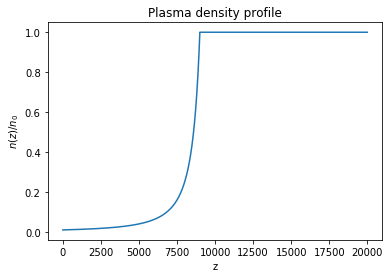

In [14]:
_,_ = get_density_profile(name = 'species', idx = 0, plot = True, save=False, path = '..')